# Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [3]:
data = pd.read_csv(list(uploaded.keys())[0])

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


There are no null values and no need to change any data type.

In [6]:
data.duplicated().sum()

np.int64(0)

There are no duplicates rows

In [7]:
data['animal name'].value_counts().sort_values(ascending = False)

,count
animal name,
frog,2
aardvark,1
bass,1
antelope,1
bear,1
...,...
wallaby,1
wasp,1
wolf,1


In [8]:
data[data['animal name'] == 'frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


There is a duplicated row with frog name but says venomous. Need to remove the row saying frog as venomous.

# Preprocessing

## Removing the duplicated rows

In [9]:
df = data.copy()

In [10]:
df = df.drop_duplicates(subset = 'animal name').reset_index(drop = True)

In [11]:
df[df['animal name'] == 'frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5


# EDA

## Count Plots

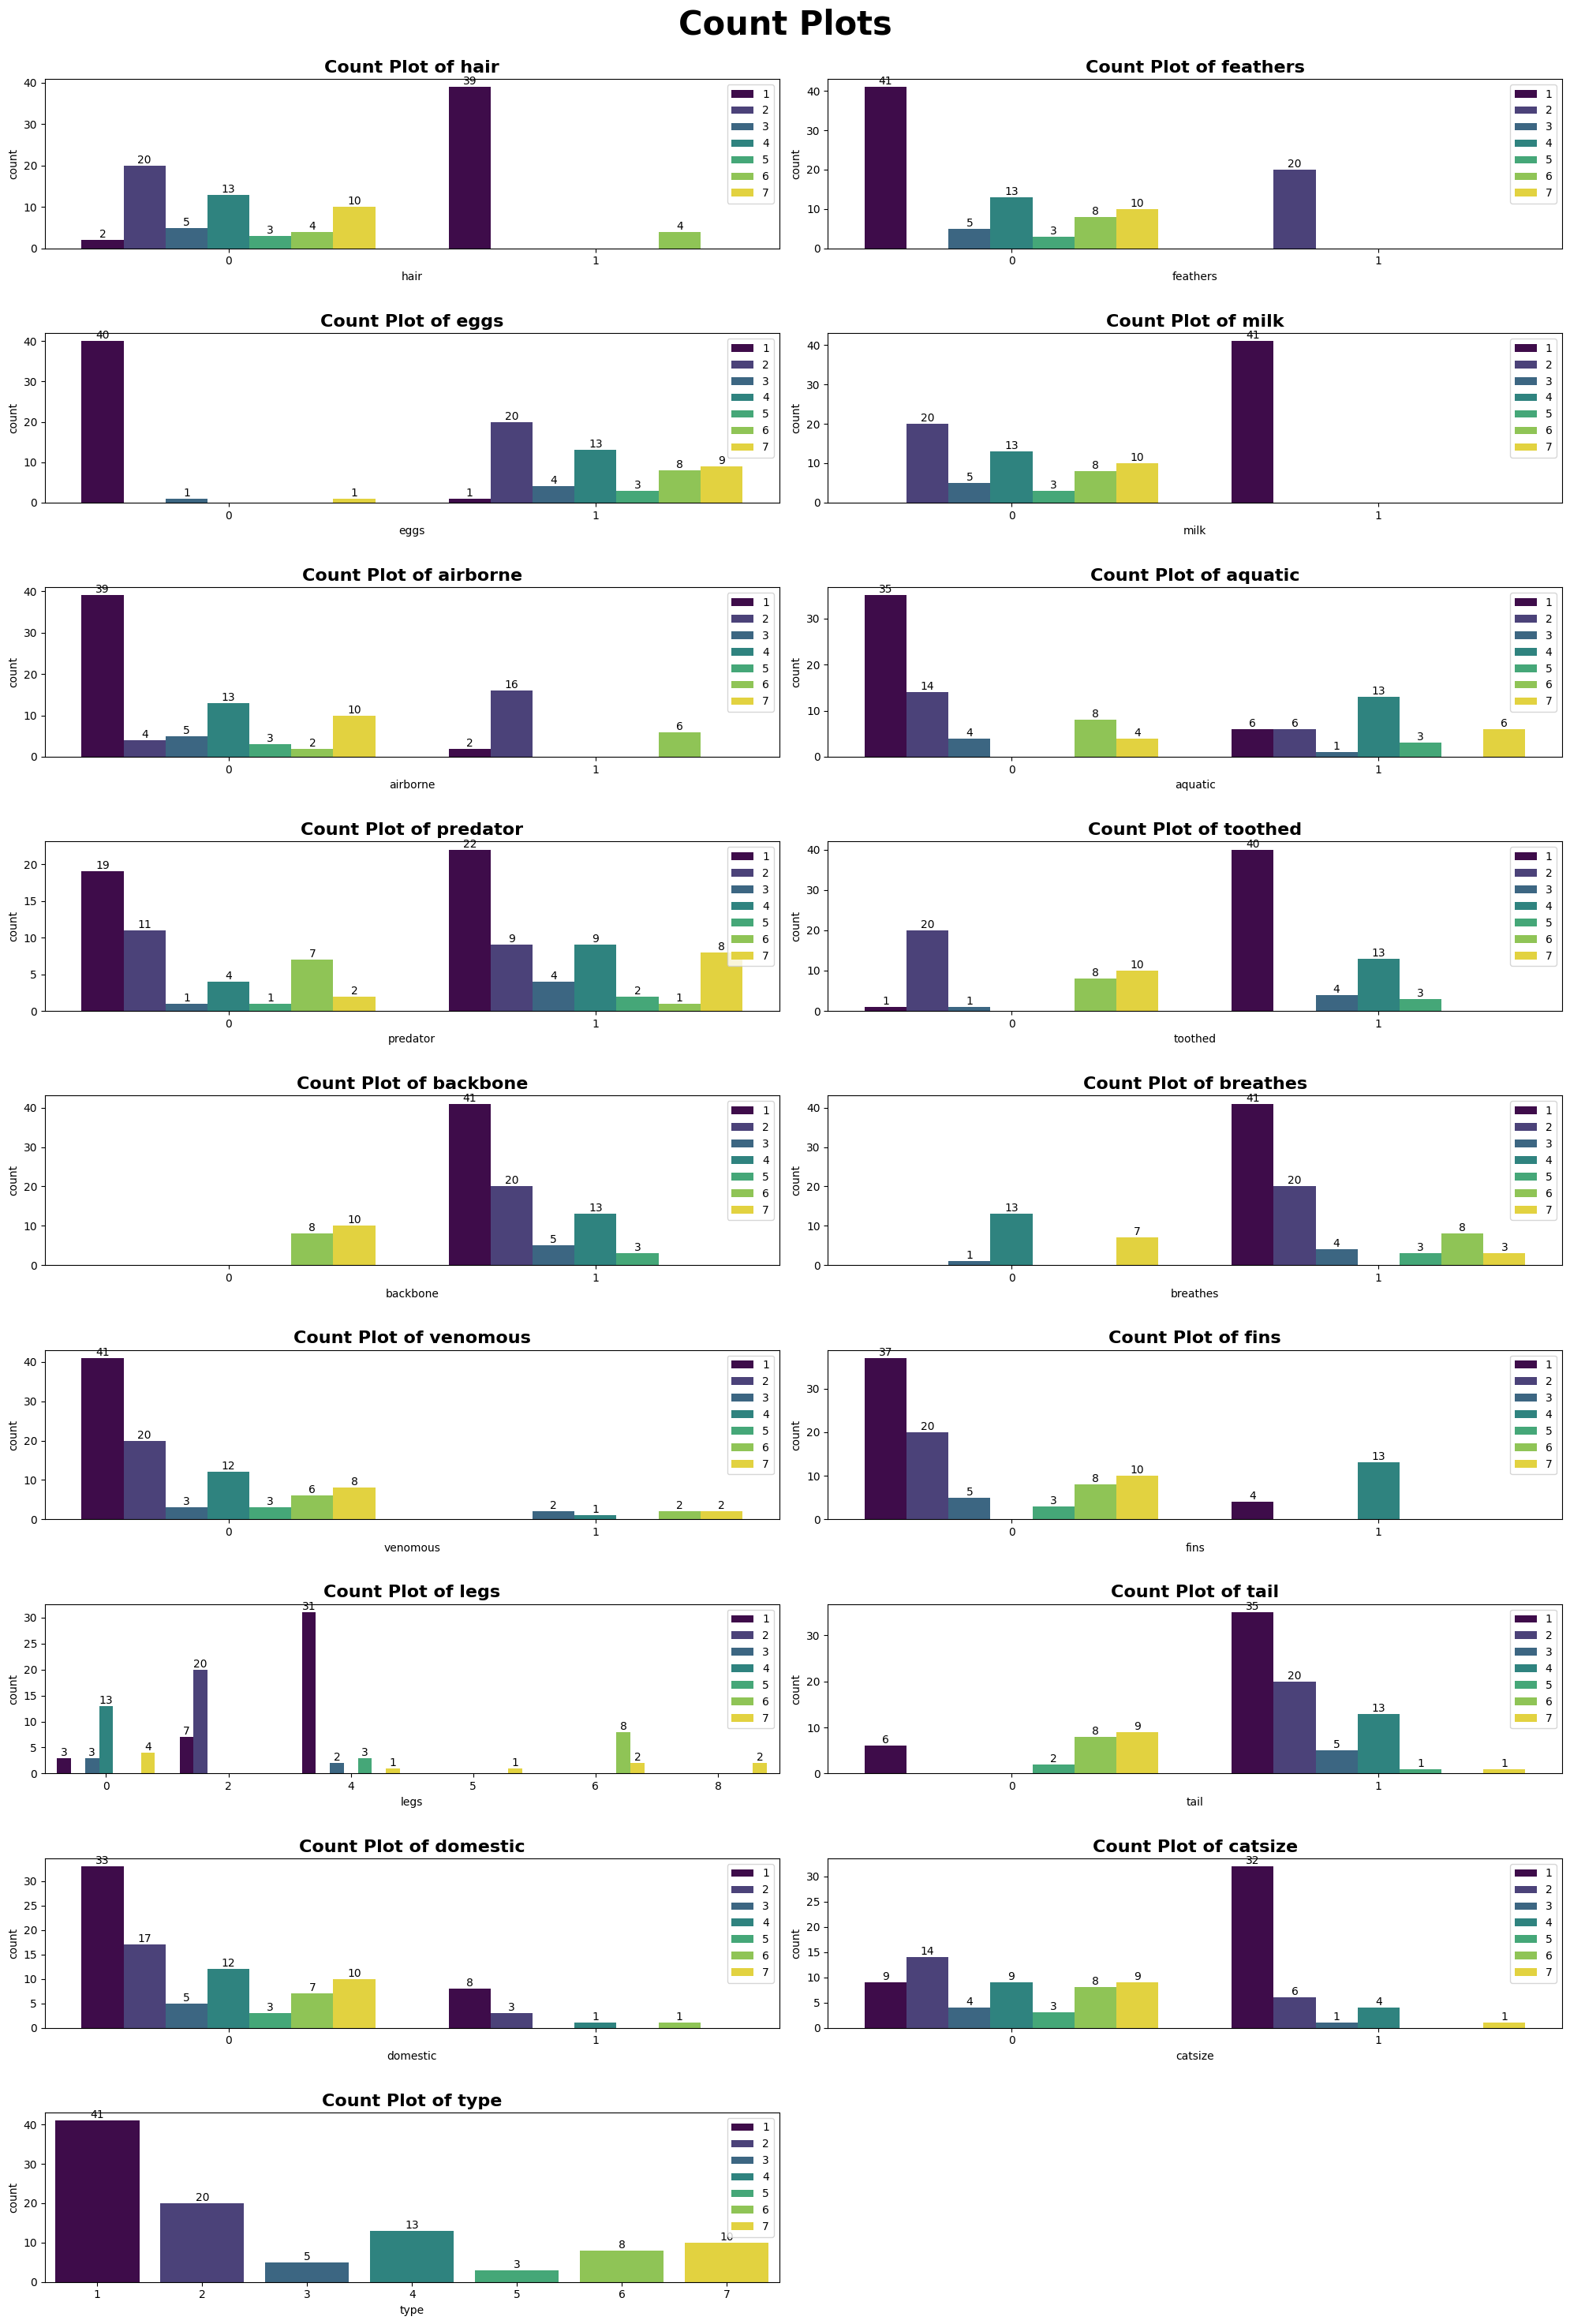

In [12]:
p = 1
n_cols = 2
n_rows = np.ceil(len(df.columns)/n_cols).astype(int)
plt.figure(figsize = (20,30))
plt.suptitle('Count Plots', fontsize = 30, fontweight = 'bold',)


for col in df.drop('animal name', axis= 1).columns:
  plt.subplot(n_rows, n_cols, p)
  baar = sns.countplot(data = df, x= col, hue = 'type', palette='viridis', legend = 'auto')

  for container in baar.containers:
    baar.bar_label(container)

  plt.title(f'Count Plot of {col}', fontsize = 16, fontweight = 'bold')
  plt.legend(loc='upper right',)
  plt.tight_layout()
  p+=1

plt.subplots_adjust(top = 0.95, hspace=0.5)
plt.show()

Defining Features: Certain features are exclusive to one type, making them perfect classifiers. For example, feathers only appear in Type 2, and milk only appears in Type 1. Having exactly 6 legs is unique to Type 6.

Common Traits: Having a backbone is a very common trait, shared by Types 1, 2, 3, 4, and 5. Laying eggs is also widespread among most types, with mammals being the main exception.

Rarity: Features like being venomous or domestic are relatively rare across the dataset.

Data Distribution: Type 1 (Mammals) has the highest number of species in this dataset, while Type 3 (Reptiles) has the fewest.

## Box Plots

<Figure size 2000x1600 with 0 Axes>

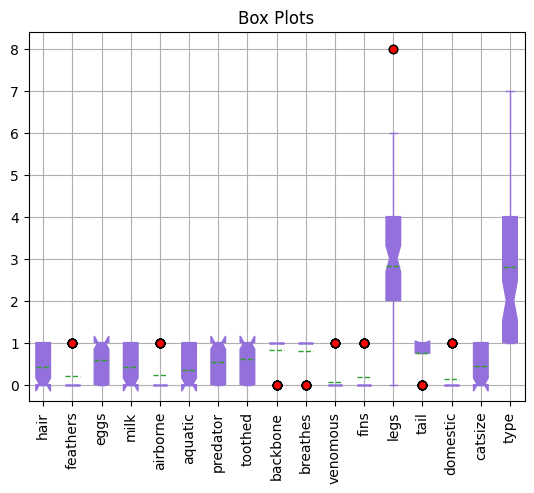

In [13]:
plt.figure(figsize = (20,16))
df.plot(kind = 'box', vert =True, notch = True, grid = True, showmeans = True,
        meanline = True, patch_artist = True, color = 'mediumpurple',
        flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 6))
plt.title('Box Plots')
plt.xticks(rotation = 90)
plt.show()

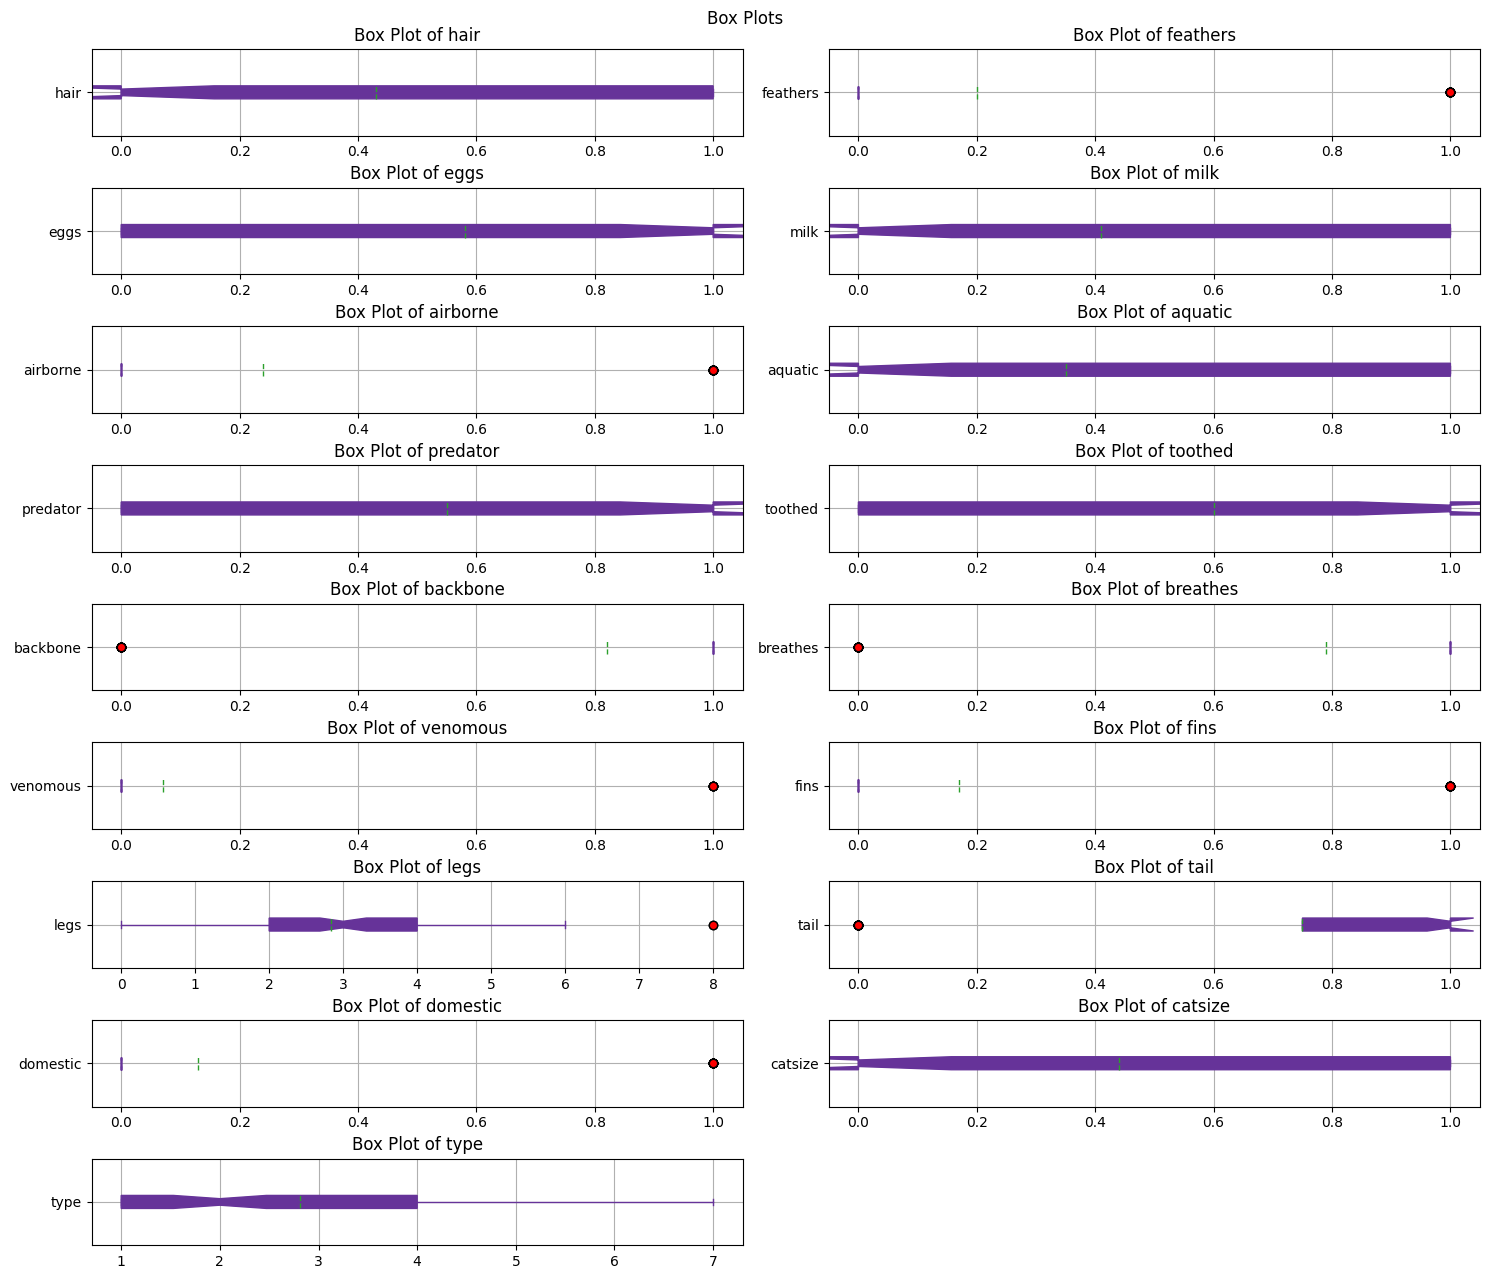

In [14]:
p = 1
n_cols = 2
n_rows = np.ceil(len(df.columns)/2).astype(int)
plt.figure(figsize = (15,13))
plt.suptitle('Box Plots')


for col in df.drop('animal name', axis= 1).columns:
  plt.subplot(n_rows, n_cols, p)
  df[col].plot(kind = 'box', vert =False, notch = True, grid = True, showmeans = True,
        meanline = True, patch_artist = True, color = 'rebeccapurple',
        flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 6))
  plt.title(f'Box Plot of {col}')
  p+=1
  plt.tight_layout()

plt.subplots_adjust(top = 0.95, hspace=0.6)
plt.show()

## Distribution Plots

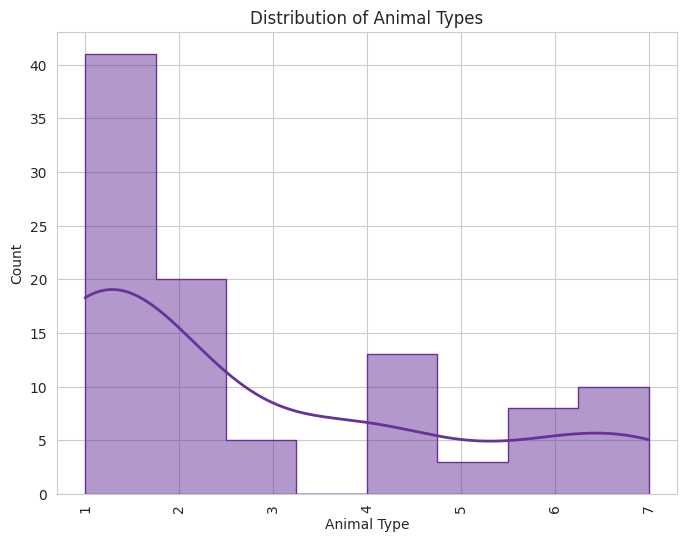

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.histplot(data = df, x = 'type', kde = True, element = 'step',
              multiple='layer', color = 'rebeccapurple',
             line_kws={'linewidth' : 2})
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

Legs : This is the most varied feature. The median number of legs is 3, and 50% of the animals have between 2 and 4 legs (the Interquartile Range). The density plot clearly shows distinct clusters of animals with 0, 2, 4, and 6 legs, corresponding to different classes like fish, birds, mammals, and insects. Having 8 legs is rare enough to be considered an outlier.

Animal Type: The distribution of animal types is skewed towards the lower numbers. The median type is 2, and half the dataset is composed of animals from types 1 through 4. This shows that categories like mammals (Type 1) and birds (Type 2) are much more common in this dataset than categories like insects (Type 6) or other invertebrates (Type 7).

In [20]:
df[df['legs'] == 8]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
52,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
71,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7


The outliers in the data are meant to say something about the animal type. Here the outliers in the legs tell about the animals having 8 legs too present in the nature and were considered in type 7. These type of animals were not rare. SO, from the analysis there is no need to remove the outliers.

## Scatter Plots

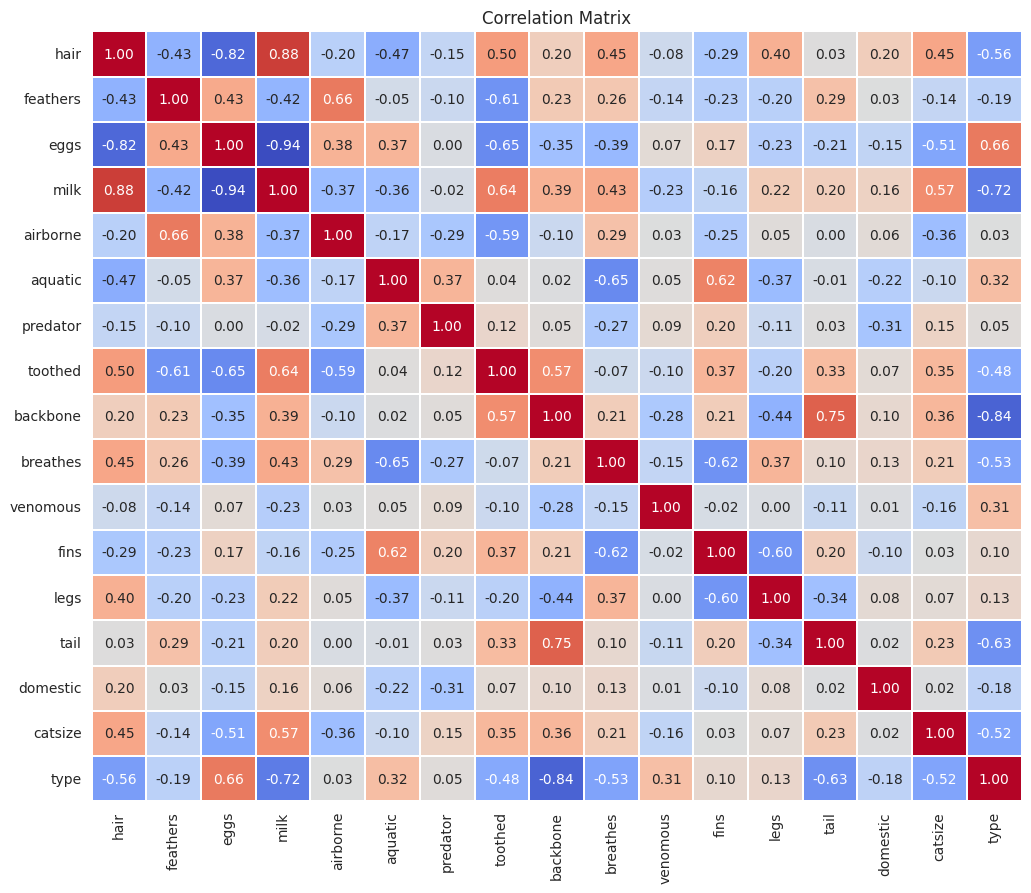

In [27]:
plt.figure(figsize = (12,10))
sns.heatmap(df.drop('animal name', axis = 1).corr(), annot = True, cbar = False, cmap ='coolwarm',
            fmt = '.2f', linewidths = 0.025)
plt.title('Correlation Matrix')
plt.show()

These are features that tend to appear together in the same animals.

milk and hair (+0.88): This is a very strong positive correlation. It indicates that animals with hair are extremely likely to produce milk. This is the classic biological definition of a mammal.  mammal.

feathers and airborne (+0.66): A strong positive correlation showing that animals with feathers are very likely to be airborne. This clearly points to the characteristics of birds.

backbone and toothed (+0.57): This shows a strong tendency for animals with a backbone (vertebrates) to also be toothed.

milk and eggs (-0.94): This is an extremely strong negative correlation, the most powerful in the entire matrix. It means that animals that produce milk almost never lay eggs, and vice-versa. This is a primary differentiator between mammals and other classes like birds, reptiles, and fish.

backbone and type (-0.84): A very strong negative correlation. This is a crucial insight: as the animal type number increases (from 1 towards 7), the likelihood of it having a backbone drops significantly. This suggests the types are ordered from vertebrates (low type numbers) to invertebrates (high type numbers).

fins and legs (-0.60): A strong negative correlation that makes perfect biological sense. Animals with fins (like fish) do not have legs, clearly separating aquatic from terrestrial life.

feathers and toothed (-0.61): This indicates that feathered animals (birds) are very unlikely to have teeth.

Milk, hair, eggs, fins, legs involved in the multicollinearity. As we are doing KNN, it can handle the multi collinearity. If the accuracy is not good, we can remove one of the feature and check for the accuracy changes.

# Split the Data

In [28]:
X = df.drop(['animal name', 'type'], axis = 1)
y = df['type']

## Scale the features

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_scaled = scaler.fit_transform(X)

In [33]:
X = pd.DataFrame(X_scaled, columns = X.columns)

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 16), (20, 16), (80,), (20,))

# KNN Model

## Model with GridSearchCv

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [101]:
param_grid = {
    'n_neighbors' : list(range(1,15)),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski', 'jaccard']
}

In [102]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'jaccard'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [103]:
best_knn = grid_search.best_estimator_
print(best_knn)
print(grid_search.best_params_)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [104]:
yhat_train = best_knn.predict(X_train)
yhat_test = best_knn.predict(X_test)

### Classification Report

In [105]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [106]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Model with default weights and metrics

In [119]:
train_acc = []
test_acc = []
for i in range(1,12) :
  mnl = KNeighborsClassifier(n_neighbors = i)
  mnl.fit(X_train, y_train)
  train_acc.append(mnl.score(X_train, y_train))
  test_acc.append(mnl.score(X_test, y_test))


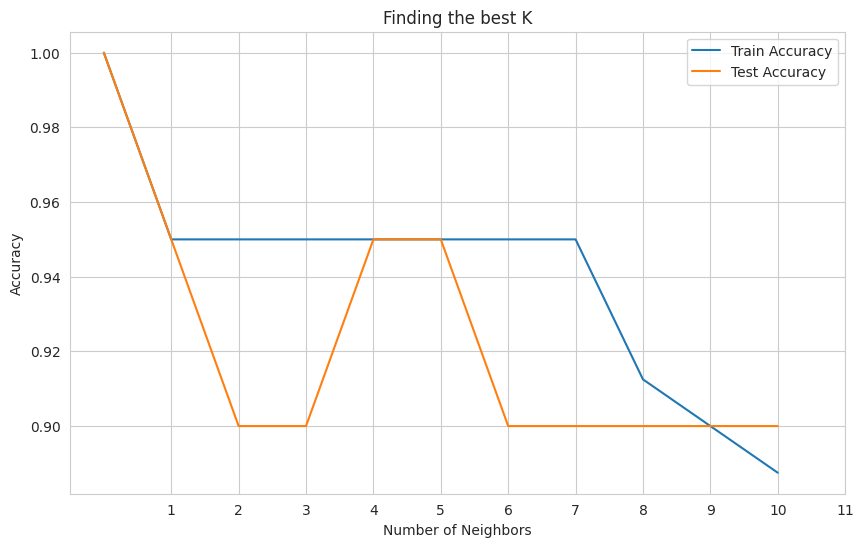

In [120]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
plt.plot(train_acc, label = 'Train Accuracy')
plt.plot(test_acc, label = 'Test Accuracy')
plt.title('Finding the best K')
plt.xticks(list(range(1,12)))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

With 1 K the accuracy is high for test data than the train data. K = 4 seems to be the perfect number. When i build the model with the GridSearch without weights it gave me 4 as the best estimator.

## Model with different weights and distances

In [154]:
mnl1 = KNeighborsClassifier(n_neighbors = 2, weights = 'distance', metric = 'manhattan')
mnl2 = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', metric = 'euclidean')
mnl3 = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', metric = 'manhattan')
mnl4 = KNeighborsClassifier(n_neighbors = 2, weights = 'distance', metric = 'euclidean')

In [155]:
mnl1.fit(X_train, y_train)
mnl2.fit(X_train, y_train)
mnl3.fit(X_train, y_train)
mnl4.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2, weights='distance')

In [156]:
yhat_mnl1_train = mnl1.predict(X_train)
yhat_mnl1_test = mnl1.predict(X_test)

yhat_mnl2_train = mnl2.predict(X_train)
yhat_mnl2_test = mnl2.predict(X_test)

yhat_mnl3_train = mnl3.predict(X_train)
yhat_mnl3_test = mnl3.predict(X_test)

yhat_mnl4_train = mnl4.predict(X_train)
yhat_mnl4_test = mnl4.predict(X_test)

In [157]:
print('Classification Report with mnl1\n')
print(classification_report(y_train, yhat_mnl1_train))
print(classification_report(y_test, yhat_mnl1_test))
print("-"*20)

print('\nClassification Report with mnl2\n')
print(classification_report(y_train, yhat_mnl2_train))
print(classification_report(y_test, yhat_mnl2_test))
print("-"*20)

print('\nClassification Report with mnl3\n')
print(classification_report(y_train, yhat_mnl3_train))
print(classification_report(y_test, yhat_mnl3_test))
print("-"*20)

print('\nClassification Report with mnl4\n')
print(classification_report(y_train, yhat_mnl4_train))
print(classification_report(y_test, yhat_mnl4_test))
print("-"*20)

Classification Report with mnl1

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00  

With neighbors 2, uniform weights and manhattan distance, the model gave best accuracy scores for train and test. The other models gave either overfitting or underfitting. I've tested with 1,2,3,4,5 neighbors but 2 & 4 best results and 2 having 0.01 more accuracy than 4 neighbors. Hence chosen 2 neighbors.

## Final Mode

In [162]:
fn_ml = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', metric = 'manhattan')
fn_ml.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [163]:
yhat_fn_ml_train = fn_ml.predict(X_train)
yhat_fn_ml_test = fn_ml.predict(X_test)

In [164]:
print('Classification Report of Train Data\n')
print(classification_report(y_train, yhat_fn_ml_train))
print("-"*20)

print('\nClassification Report of Test Data\n')
print(classification_report(y_test, yhat_fn_ml_test))

Classification Report of Train Data

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.95      1.00      0.97        18
           3       0.75      0.75      0.75         4
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3
           6       0.88      1.00      0.93         7
           7       1.00      0.71      0.83         7

    accuracy                           0.96        80
   macro avg       0.94      0.92      0.93        80
weighted avg       0.96      0.96      0.96        80

--------------------

Classification Report of Test Data

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       0.50      1.00    

# Visualization of the boundaries

In [165]:
from sklearn.decomposition import PCA

In [166]:
pca = PCA(n_components=2)
pcomp = pca.fit_transform(X_t)
pca_df = pd.DataFrame(pcomp, columns = ['PC1', 'PC2'])
pca_df.head(7)

,PC1,PC2
0,2.528614,-0.295213
1,2.855673,-0.405786
2,-1.757239,3.716122
3,2.528614,-0.295213
4,2.805894,0.098102
5,2.855673,-0.405786
6,3.137362,-0.752279


In [167]:
pca_df['type'] = y

In [168]:
pca_df.head()

,PC1,PC2,type
0,2.528614,-0.295213,1
1,2.855673,-0.405786,1
2,-1.757239,3.716122,4
3,2.528614,-0.295213,1
4,2.805894,0.098102,1


In [179]:
fn_ml.fit(pca_df[['PC1', 'PC2']], pca_df['type'])

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [180]:
yhat_pca = fn_ml.predict(pca_df[['PC1', 'PC2']])

In [183]:
print(classification_report(pca_df['type'], yhat_pca))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       0.83      1.00      0.91        20
           3       0.67      0.80      0.73         5
           4       1.00      1.00      1.00        13
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         8
           7       1.00      0.80      0.89        10

    accuracy                           0.94       100
   macro avg       0.79      0.80      0.79       100
weighted avg       0.92      0.94      0.93       100



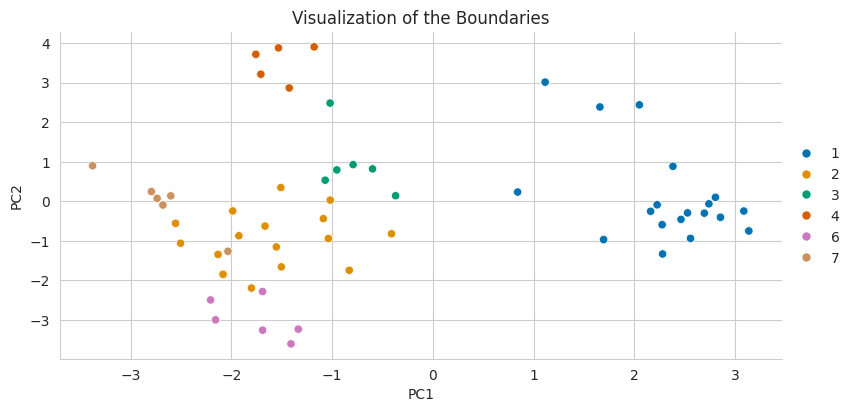

In [206]:
sns.set_style('whitegrid')
sns.relplot(pca_df, x = 'PC1', y = 'PC2', hue = yhat_pca ,kind = 'scatter',
            palette = 'colorblind', legend = 'brief', aspect = 2.0, height = 4)
plt.title('Visualization of the Boundaries')
plt.show()

## Visulaization using MeshGrid

To visualize the actual boundaries we can use meshgrid.

In [207]:
from matplotlib.colors import ListedColormap

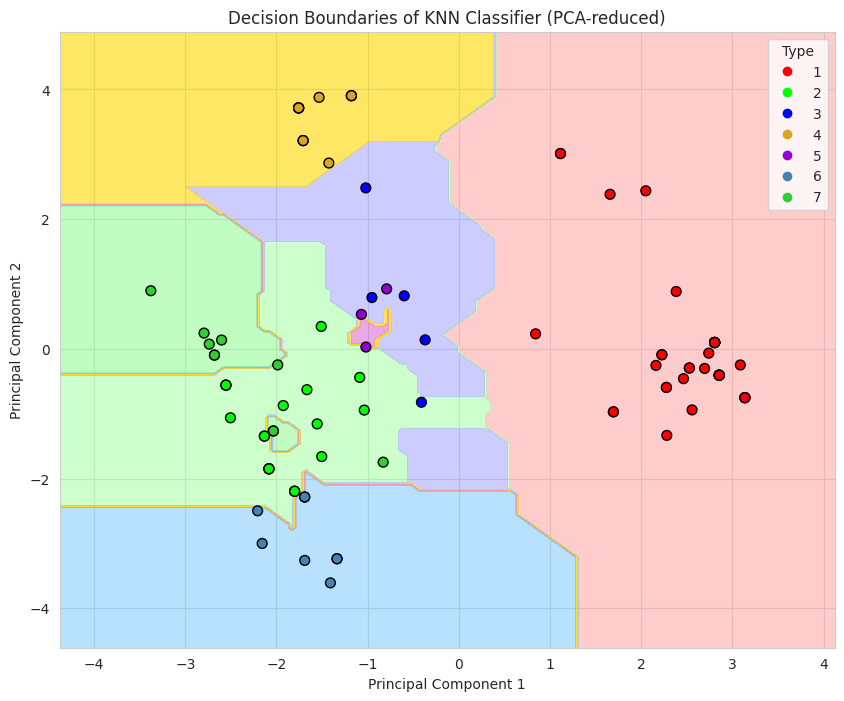

In [208]:
x_min, x_max = pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1
y_min, y_max = pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict over meshgrid
Z = fn_ml.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700', '#DA70D6', '#87CEFA', '#98FB98'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#DAA520', '#9400D3', '#4682B4', '#32CD32'])

# Plot decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['type'], cmap=cmap_bold, edgecolor='k', s=50)
plt.title("Decision Boundaries of KNN Classifier (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(), title="Type")
plt.show()